<a href="https://colab.research.google.com/github/wantyaayu/Project-1-if-else-algoritma/blob/main/Citrapict1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AttributeError: 'NoneType' object has no attribute 'ravel'

In [53]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [40]:
# to run in google colab
import sys

if "google.colab" in sys.modules:

    def download_from_web(url):
        import requests

        response = requests.get(url)
        if response.status_code == 200:
            with open(url.split("/")[-1], "wb") as file:
                file.write((response.content))
        else:
            raise Exception(f"Failed to download the image. Status code: {response.status_code}")

    download_from_web('https://images.unsplash.com/photo-1744782558437-4cea963e8327?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')



In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

figsize = (10, 10)


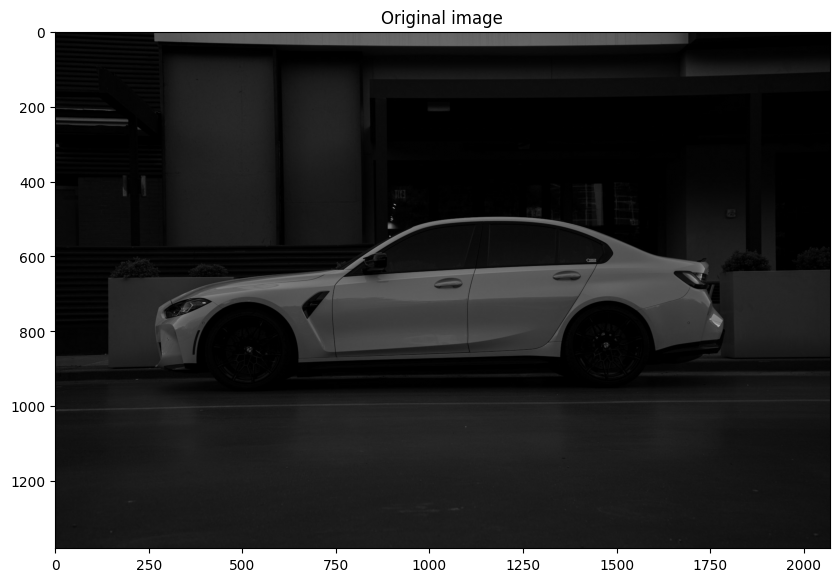

In [41]:
# read as grayscale
I = cv2.imread("photo-1744782558437-4cea963e8327?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D", 0)

plt.figure(figsize=figsize)
plt.imshow(I, cmap="gray", vmin=0, vmax=255)
plt.title("Original image")
plt.show()

In [43]:
bins_edges_min_max = [0, 256]
num_bins = 256
bin_count, bins_edges = np.histogram(I, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]

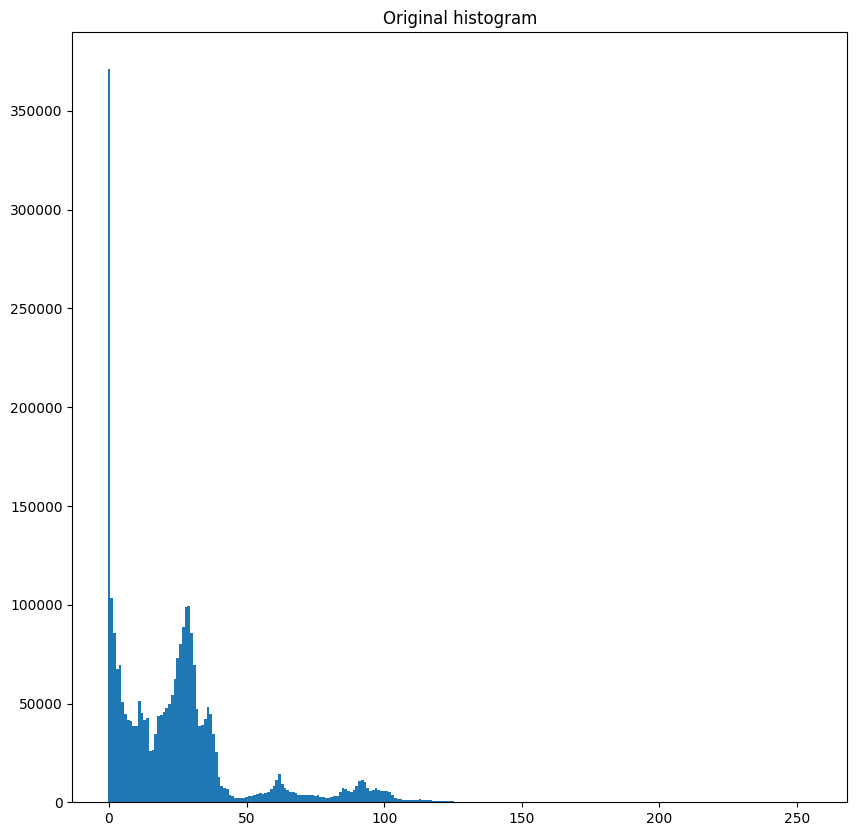

In [44]:
def draw_hist(x_axis, input):
    fig, ax = plt.subplots(figsize=figsize)
    # why not using plt.hist? because we want to plot also some derivations of this hist, so this is easier
    plt.bar(x_axis, input, width=input.shape[0] / (x_axis[-1] - x_axis[0] + 1))
    return fig, ax


draw_hist(bins_start, bin_count)
plt.title("Original histogram")
plt.show()


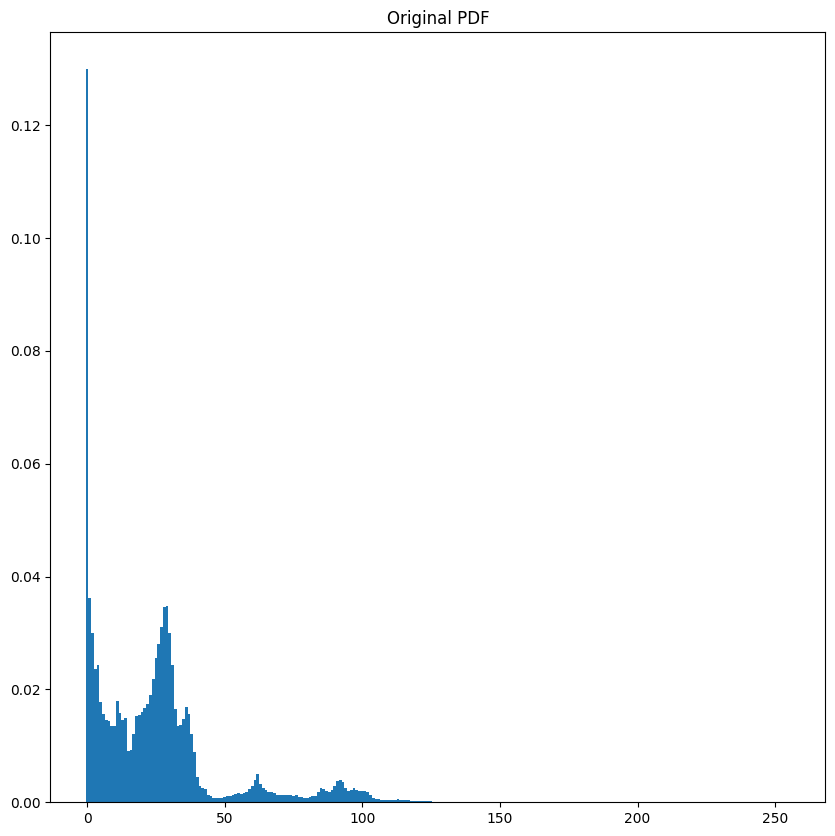

In [45]:
pdf = bin_count / np.sum(bin_count)

draw_hist(bins_start, pdf)
plt.title("Original PDF")
plt.show()

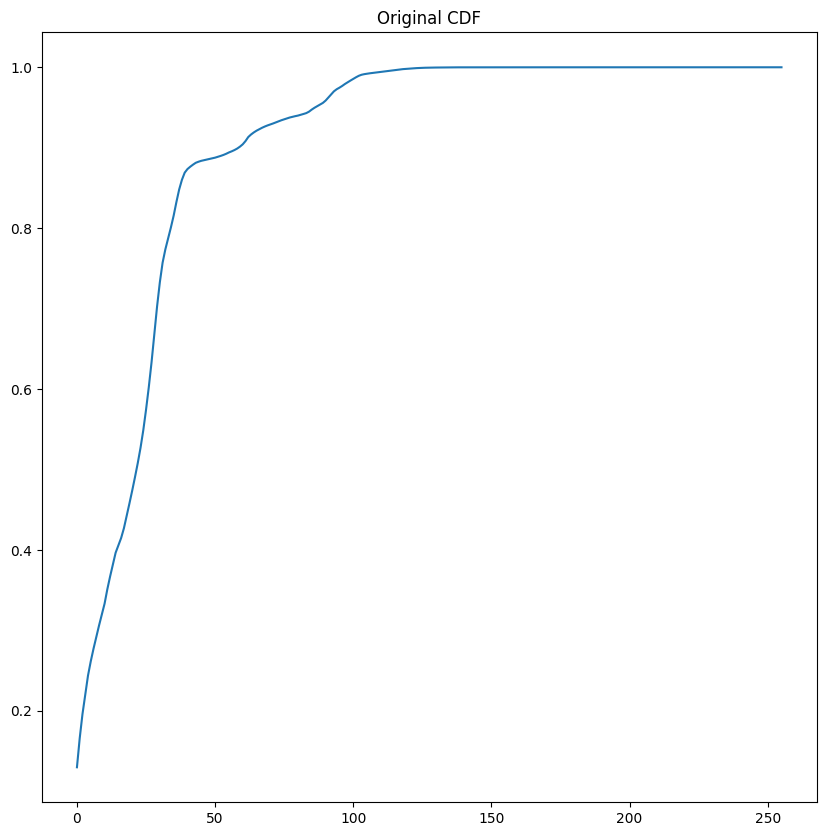

In [46]:
cdf = np.cumsum(pdf)

plt.figure(figsize=figsize)
plt.plot(cdf)
plt.title("Original CDF")
plt.show()

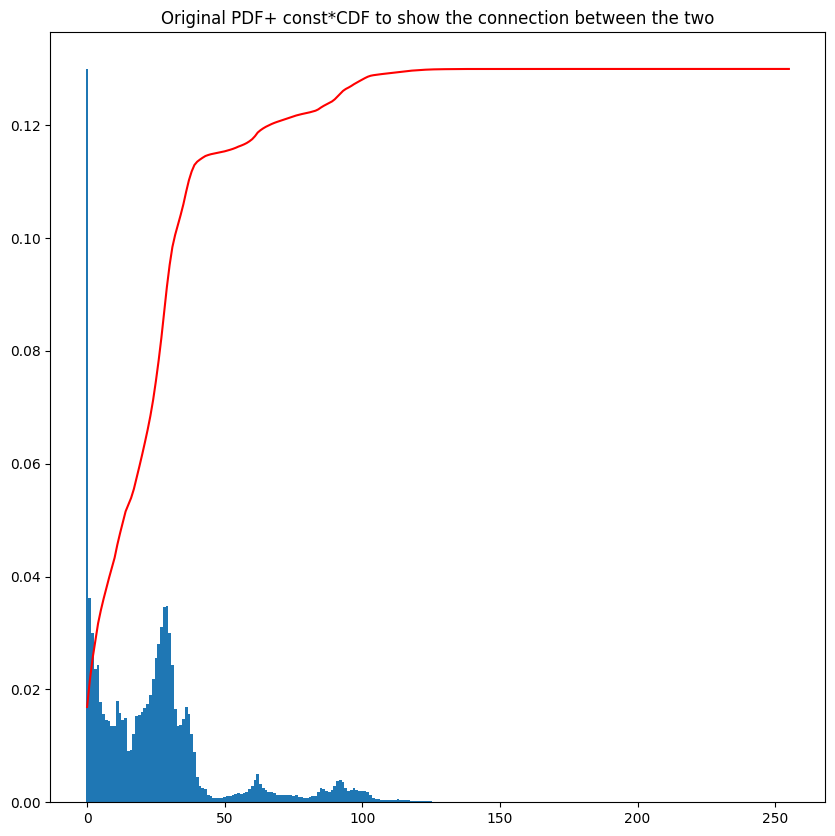

In [47]:
fig, ax = draw_hist(bins_start, pdf)
ax.plot(cdf * np.max(pdf), "r")
plt.title("Original PDF+ const*CDF to show the connection between the two")
plt.show()


In [48]:
f_eq = np.round(cdf * 255).astype(int)

f_eq

array([ 33,  42,  50,  56,  62,  67,  71,  74,  78,  82,  85,  90,  94,
        97, 101, 103, 106, 109, 113, 117, 121, 125, 130, 134, 140, 146,
       154, 162, 170, 179, 187, 193, 197, 201, 204, 208, 212, 216, 219,
       222, 223, 223, 224, 225, 225, 225, 226, 226, 226, 226, 226, 227,
       227, 227, 228, 228, 228, 229, 229, 230, 231, 232, 233, 234, 234,
       235, 235, 236, 236, 237, 237, 237, 238, 238, 238, 239, 239, 239,
       239, 240, 240, 240, 240, 240, 241, 242, 242, 243, 243, 244, 244,
       245, 246, 247, 248, 249, 249, 250, 250, 251, 251, 252, 252, 253,
       253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

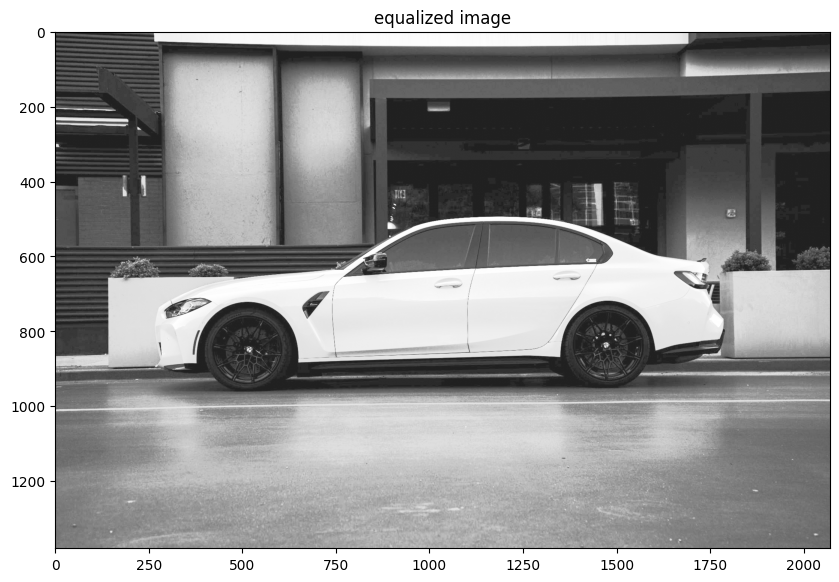

In [49]:
I_eq = f_eq[I]

plt.figure(figsize=figsize)
plt.imshow(I_eq, cmap="gray", vmin=0, vmax=255)
plt.title("equalized image")
plt.show()

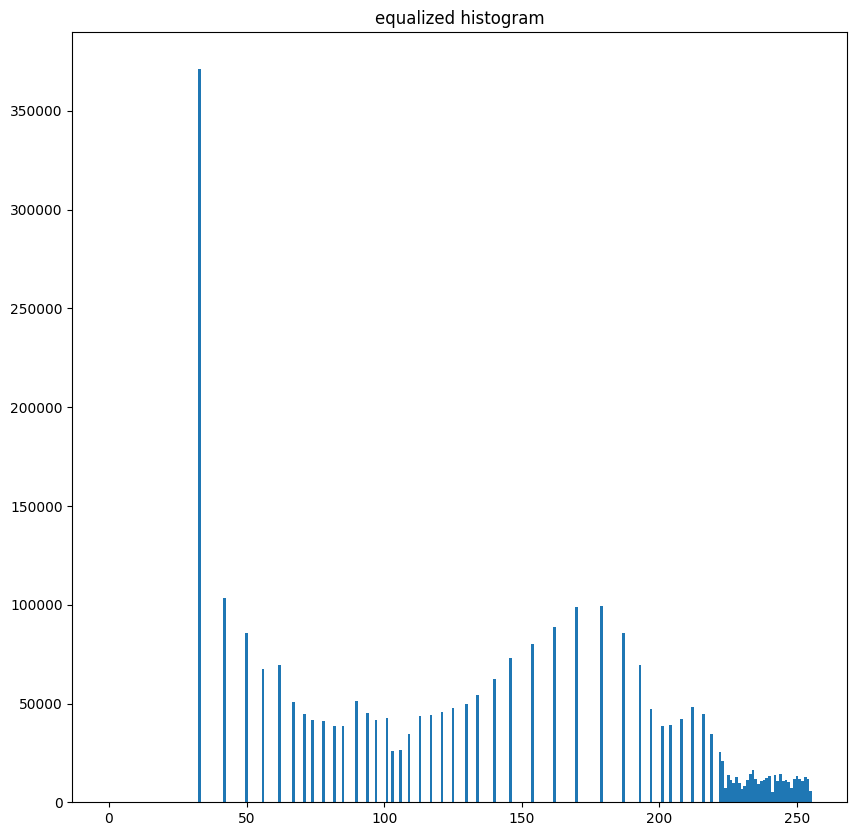

In [50]:
bin_count, bins_edges = np.histogram(I_eq, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]

draw_hist(bins_start, bin_count)
plt.title("equalized histogram")
plt.show()


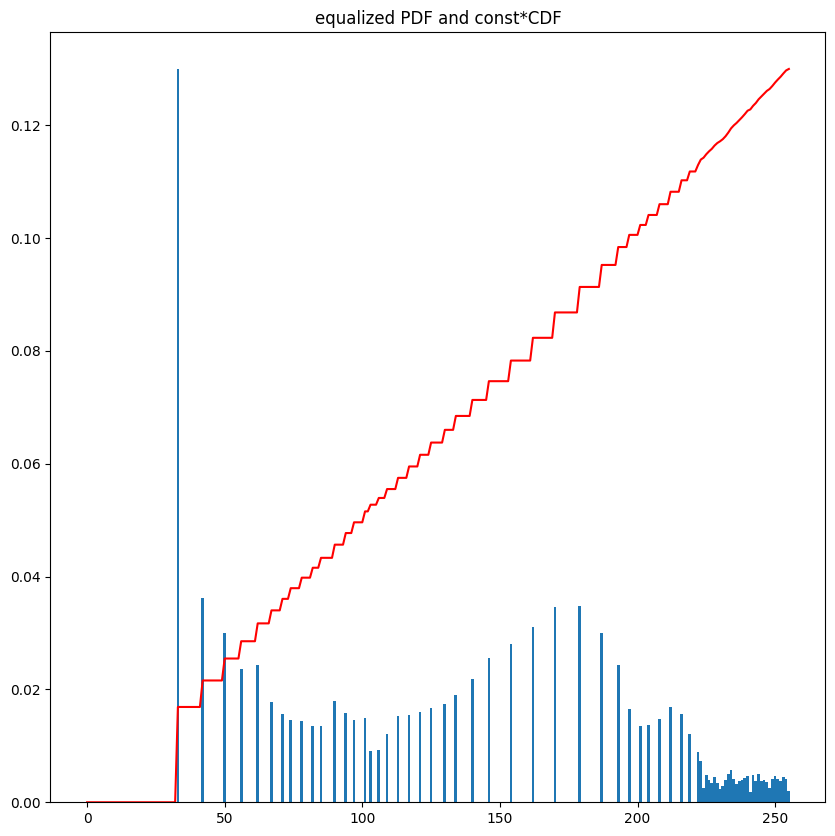

In [51]:
pdf = bin_count / np.sum(bin_count)
cdf = np.cumsum(pdf)

fig, ax = draw_hist(bins_start, pdf)
ax.plot(cdf * np.max(pdf), "r")
plt.title("equalized PDF and const*CDF")
plt.show()


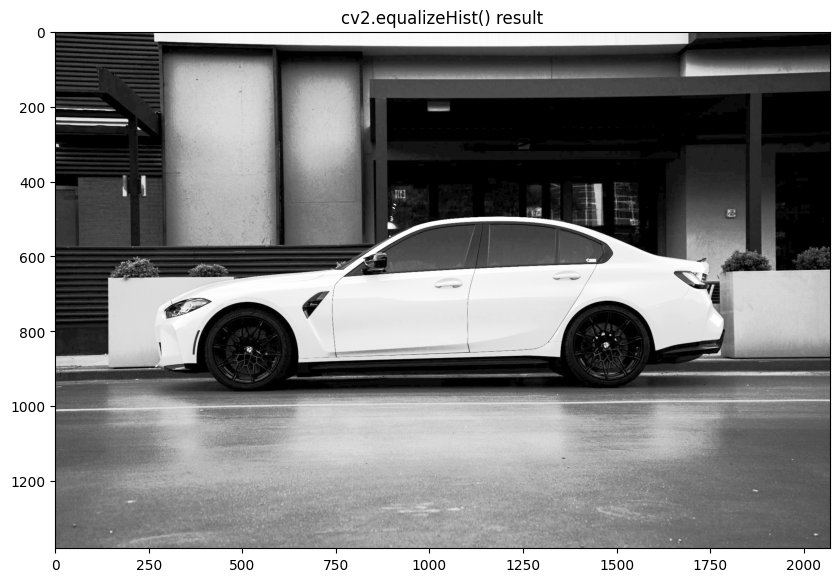

In [52]:
I_eq_cv2 = cv2.equalizeHist(I)

plt.figure(figsize=figsize)
plt.imshow(I_eq_cv2, cmap="gray", vmin=0, vmax=255)
plt.title("cv2.equalizeHist() result")
plt.show()